# Linear Regression

In [4]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing,  svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1]:
df = quandl.get("WIKI/GOOGL")

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
# Pair down the dataframe
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [5]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
#After executing this line of code, any row in the DataFrame df that contains at least one missing value will be removed.
#If inplace is set to True, the changes will be made directly to the original DataFrame
df.dropna(inplace=True) 

In [ ]:
#defined X (features), as our entire dataframe EXCEPT for the label column, converted to a numpy array. 
#We do this using the .drop method that can be applied to dataframes, which returns a new dataframe. 
#Next, we define our y variable, which is our label, as simply the label column of the dataframe, converted to a numpy array.
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [ ]:
# Preprocessing 
X = preprocessing.scale(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

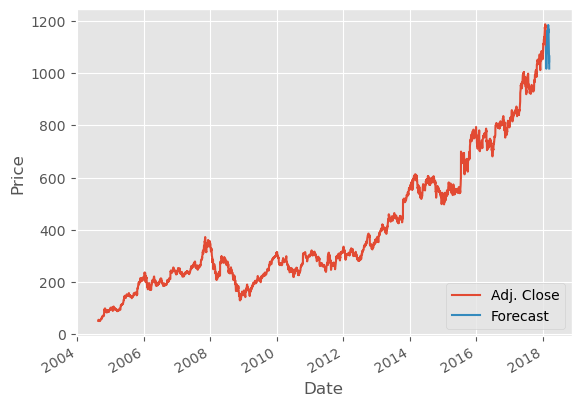

In [17]:
# Full code after learning concepts
import quandl
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

# Getting data from Quandl
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

# Updated to model_selection.train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

## Using LinearRegression directly without cross_validation
# clf = LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)
## takes away the training time 
# with open('linearregression.pickle','wb') as f:
#     pickle.dump(clf, f)
# confidence = clf.score(X_test, y_test)

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

# Making predictions for future dates
forecast_set = clf.predict(X_lately)

# Adding forecasted values to the DataFrame
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

# Plotting the results
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


  ## Linear Regression from scratch

In [27]:
from statistics import mean
import numpy as np
from matplotlib import style

style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,], dtype=np.float64)
ys = np.array([5,4,6,5,6,], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    # Formula for the best fit line
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    # Formula for the intercept
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


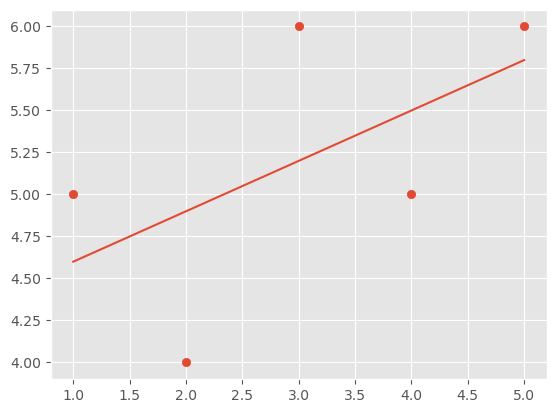

In [25]:
regression_line = [(m*x)+b for x in xs]
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

### How good of a fit is the best fit line ? R Squared and Coefficient of Determination Theory

In [28]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    # Formula for the best fit line
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    # Formula for the intercept
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    # Formula for the squared error
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)


0.3214285714285714
